# Probability for Data Manipulation
In this lecture, we will look at some basic elements of probability theory which will help us manipulate data in a more accurate and principled way.

## Uncertainty & Importance of Probability Theory

We have seen that dealing with data means dealing with "some variables
assuming some values".

However, **what can we say about what values such variables will assume**?

In some cases, it is possible to predict the values of these variables
with perfect accuracy, given a set of initial conditions. For instance,
think about a system of equations describing the *speed of objects
according to Newtonian laws*.

In other cases, modeling the relationship between variables in a
deterministic way is not possible. We often say that this is due to **uncertainty**.

As reported [here](https://www.deeplearningbook.org/contents/prob.html), **uncertainty in a system can be due to different factors**:

-   *Inherent stochasticity in the system being modeled.* Some events such as drawing a card from a deck of cards, tossing a die, or the movements of subatomic particles can be seen as truly random events. The outcomes of such events cannot be predicted with perfect accuracy, so they are stochastic (random).

-   *Incomplete observability.* Sometimes, even in a deterministic system, we cannot observe anything. For instance, in the Monty Hall problem, the participant to the game is asked to choose between three doors. One of the doors contains a prize, while the others lead to a goat. Even if the event is deterministic, the game contestant cannot observe everything, so from their point of view, the outcome is uncertain.

-   *Incomplete modeling.* Sometimes a system has to discard some of the information needed to make a decision. For instance, imagine a robotic system aiming to pick objects from a table with a single RGB camera. The system cannot reconstruct the 3D position of the objects, but the RGB camera an allow to obtain an estimate of the 2D coordinates of each objects with respect to the robot's point of view. All the information which cannot be observed is uncertain, despite the problem is a deterministic one.

### Examples

-   *Tossing a coin or rolling a die*: these kinds of experiments are
    generally impossible to model in a deterministic way. This can be
    due to our limited ability to model the event (i.e., rolling a die
    might be deterministic, but deriving a set of equations to determine
    the outcome given the initial motion of the hand is intractable).

-   *Determining if a patient has a given pathology*: different
    pathologies might have similar symptoms. Hence, observing some of
    them does not allow to determine with perfect accuracy if the
    patient has that pathology. In this case, uncertainty might arise
    from incomplete observability.

### Importance of Probability Theory

Probability theory provides a consistent framework to work with
uncertain events.

It allows to quantify and manipulate uncertainty with a set of axioms,
as well as to derive new uncertain statements.

Probability theory is hence **an important tool to work with data**. We
will start to revise the main concepts behind probability theory by
talking about random variables.

### Random Experiments
In practice, when the acquisition of data is affected by uncertainty, we will use the term **random experiment**. We will informally define a random experiment as:

> An experiment which can be repeated any number of times, leading to different outcomes.

We will use the following terminology:
* **sample space** $\Omega = \{\omega_1,\ldots,\omega_k\}$: the set of all possible outcomes of the experiment;
* **simple event** $\omega_i$: a possible outcome of a random experiment;
* **event** $A \subseteq \Omega$: a subset of the sample space including certain events. We usually denote $\overline A = \Omega \setminus A$ as the complementary event to $A$, i.e., the event that $A$ does not happen.

Given the definitions above, $\Omega$ is often called the **sure event** or **certain event**, because it contains all possible outcomes. The null set $\emptyset$ is called the **impossible event**.


#### Example
Let us consider the random experiment of tossing a die. Our outcomes will be numbers which we read on the top face of the die when it lands. We will have:
* Sample space: $\Omega=\{1,2,3,4,5,6\}$;
* Simple event: an example of a simple event would be $\omega_1=1$;
* Event: the event "we obtain 1" could be denoted by $A=\{1\}$. The event "we obtain an even number" can be denoted by $A=\{2,4,6\}$. We would have $\overline A = \{1,3,5\}$, the event that "we obtain an odd number".

## Random Variables

We have so far talked about "statistical variables". When
dealing with uncertain events, we need to use the concept of 'random
variables'. Informally (from wikipedia):

> A random variable is a variable whose values depend on outcomes of a random phenomenon.

A random variable is characterized by a set of possible values often
called *sample space*, *probability space*, or *alphabet* (this last term comes from
information theory, where we often deal with sources emitting symbols
from an alphabet, in which case the values of $X$ will be the symbols).

Formally, if $\Omega$ is the *sample space*, we will define a random variable as a function:

$$ X : \Omega \to E $$

Where E is a measurable space and often $E=\mathbb{R}$. This definition is similar to the one of statistical variable we have given before.

A random variable is generally denoted by a *capital letter*, such as
$X$.

Random variables can be *discrete* or *continuous*. Discrete random
variables can assume a finite number (or a countable infinite number) of
possible values, whereas a continuous random variable is generally
associated with a real number.

Random variables can be *scalar* (e.g., X=1) or *multi-dimensional*
(e.g., $X = \binom{1}{3}$, or $X = \begin{pmatrix}
1 & 2 \\
3 & 4 \\
\end{pmatrix}$).

A random variable is always related to some *uncertain phenomenon* which
generates observations. This is often referred also as 'experiment'. For
instance, if a random variable takes the values of tossing a coin, then
'tossing a coin' is the underlying experiment.


The following table lists some examples (see also descriptions below).

||**Discrete**|**Continuous**|
|-|-|-|
|**Scalar**             | Tossing a coin         | Height of a person|
|**Multidimensional**   | Pair of dice           | Coordinates of a car|

### Example - discrete scalar

-   For example, $X$ may denote the outcome of tossing a coin;

-   In this context, 'tossing a coin' is the random phenomenon
    characterizing the random variable;

-   The space of possible values that $X$ can assume (the alphabet of
    $X$) can be defined as $\left\{ head,\ tail \right\}$. In this
    example, $X$ is discrete;

-   If tossing the coin, the outcome is $head$, then the variable $X$
    assumes the value $X = head$.

### Example - continuous scalar

-   $X$ may denote the height in meters of a student in this class;

-   If we pick a student of heigh 1.75m, then $X = 1.75$;

### Example - continuous multi-dimensional

-   $X$ may denote the latitude and longitude coordinates of a car in
    the world;

-   Once we pick a car, we may have $X = \binom{37}{15}$.

### Example - discrete multi-dimensional

-   $X$ may denote the outcome of rolling two dice.

-   In this context, rolling two dice is the random phenomenon
    characterizing the random variable.

-   The space of possible values that $X$ can assume is
    $\left\{ 1,2,3,4,5,6 \right\}^{2}$ (pair of numbers between 1 and
    6).

-   Once we roll the dice, we could have $X = \binom{3}{5}$.

### Urns and Marble Example

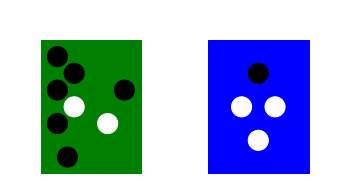

In [24]:
import matplotlib.pyplot as plt

def urn():
    # Create a figure and axis
    fig, ax = plt.subplots()

    # Define urn positions and sizes
    urn1 = plt.Rectangle((0.1, 0), 0.3, 0.4, color='green')
    urn2 = plt.Rectangle((0.6, 0), 0.3, 0.4, color='blue')

    # Define marble positions and colors within each urn
    urn1_marbles = [plt.Circle((0.2, 0.2), 0.03, color='white'),
                    plt.Circle((0.2, 0.3), 0.03, color='black'),
                    plt.Circle((0.3, 0.15), 0.03, color='white'),
                    plt.Circle((0.35, 0.25), 0.03, color='black'),
                    plt.Circle((0.18, 0.05), 0.03, color='black'),
                    plt.Circle((0.15, 0.25), 0.03, color='black'),
                    plt.Circle((0.15, 0.35), 0.03, color='black'),
                    plt.Circle((0.15, 0.15), 0.03, color='black'),]
    urn2_marbles = [plt.Circle((0.7, 0.2), 0.03, color='white'),
                    plt.Circle((0.75, 0.3), 0.03, color='black'),
                    plt.Circle((0.8, 0.2), 0.03, color='white'),
                    plt.Circle((0.75, 0.1), 0.03, color='white'),]

    # Add the urns and marbles to the plot
    ax.add_patch(urn1)
    ax.add_patch(urn2)
    for marble in urn1_marbles:
        ax.add_patch(marble)
    for marble in urn2_marbles:
        ax.add_patch(marble)

    # Set axis limits and labels
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 0.5)
    ax.set_aspect('equal', 'box')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('Marbles in Urns')
    ax.axis('off')


    # Show the plot
    plt.show()
urn()


We will now introduce an example that we will use in the rest of this lecture to reason on some basic properties of probabilities. Let's assume we have two urns urns: one green and one blue.

Each box contains marbles of two colors: black and white.

We consider the experiment of randomly drawing a marble from one of
the two urns. This happens in two stages:

-   We first randomly pick one of the two urns;

-   Then we randomly pick one of the marbles in the urn;

-   After observing the type of the marble, we replace it in the same
    urn.

The outcome of the experiment can be characterized by *two random
variables*:

-   U represents the color of the urn and can take values g (green) and b
    (blue).

-   M represents the color of the marble and can take values b (black) and w
    (white).

-   If we pick a white marble from the blue urn, then the outcome of the
    experiment can be characterized by the values $M = w$, $U = b$;

## Working Definition of Data

We will define "data" as follows:

> The values assumed by a random variable

### Example

-   For instance, if the outcome of tossing a coing is $head$, then
    $X = head$ *is data*;

-   It should be clear that the 'data' is *the pair* \<random variable,
    value\> and not just the value. Indeed $head$ alone would not be
    very useful (we don't know which phenomenon it is related to),
    whereas $X = head$ can be useful, as we know that $X$ is the random
    variable describing the outcome of tossing a coin;

-   In this example, the data $X = head$ is representing a fact: 'I
    tossed a coin and the outcome was $head$'. This is also called 'an
    event';

## Probability

Since random variables are related to stochastic phenomena, we cannot
say much about the outcome of a single phenomenon.

However, we expect to be able to characterize the class of experiments
related to a random variable, to infer rules on what values the random
variable is likely to take.

For instance, in the case of coin tossing, we can observe that, if I
toss a coin for a large number of times, the number of heads will be
roughly similar to the number of tails.

This kind of observations is useful, as it can give us a prior on what
values we are likely to encounter and what are not.

To formally express such rules, we can define the concept of probability
on a random variable.

Specifically, it is possible to assign a probability value to a given
outcome. This is generally represented with a capital P:

-   For instance, $P(U = b)$ represents the probability of picking a
    blue urn in the previous example;

-   A probability $P(U = b)$ is a number comprised between 0 and 1 which
    quantifies how likely we believe the event to be;
    -   0 means impossible;
    -   1 means certain;

When it is clear from the context which variable we are referring to,
the probability can also be expressed simply as:

$$P(b) = P(U = b)$$

### Probability Axioms
Kolmogorov in 1933 provided three axioms which define the "main rules" that probability should follow:

**Axiom 1**
Any event has a probability in the range $[0,1]$:

$$0 \leq P(A) \leq 1, \forall A\subseteq \Omega$$

**Axiom 2**
The certain event has probability 1:

$$P(\Omega) = 1$$

**Axiom 3**
If $A$ and $B$ are disjoint event (i.e., $A \cap B = \emptyset$), then:

$$P(A \cup B) = P(A) + P(B)$$

From these axioms, the following corollaries follow:

$$P(\overline A) = 1 - P(A)$$
$$P(\emptyset) = P(\overline \Omega) = 1 - P(\Omega) = 0$$
$$P(A \cup B) = P(A) + P(B) - P(A \cap B)$$
$$A \subseteq B \Rightarrow P(A) \leq P(B)$$

### Laplace Probability
When all outcomes in a random experiment are considered equally probable, this is called a **Laplace experiment**. In this case, we can calculate the probability of a given event $A$ as the ratio between the favorable outcomes and the possible outcomes:

$$P(A) = \frac{|A|}{|\Omega|} = \frac{\text{\# favorable outcomes}}{\text{\# possible outcomes}}$$

For instance, if we are tossing a die:
* The probability of obtaining any of the faces will be: $\frac{1}{6}$;
* The probability of obtaining an even number will be: $\frac{|\{2,4,6\}|}{|\{1,2,3,4,5,6\}|} = \frac{3}{6} = \frac{1}{2}$.

### Estimating probabilities from observations

What about the cases in which we cannot make any assumption on the equal probability of events? In those cases we would like to estimate probabilities from observations. There are two main approaches to do so: frequentist and Bayesian.

#### Frequentist approach

Probability theory was initially developed to analyze the frequency of
events. For instance, it can be used to study events like drawing a
certain hand of cards in a poker game. These events are repeatable and
can be dealt with using frequencies. In this sense, when we say that an
event has probability $p$ of occurring, it means that if we repeat the
experiment infinitely many times, then a proportion $p$ of the
repetitions would result in that outcome.

According to the frequentist approach, we can estimate probabilities by
repeating an experiment for a large number of times and then computing:

-   The number of trials: how many times we performed the experiment;

-   The number of favorable outcomes: how many times the outcome of the
    experiment was favorable.

The probability is hence obtained by dividing the number of favorable
outcomes by the number of trials. 

For instance, let's suppose we want to estimate the probability of
obtaining a 'head' by tossing a coin. Let's suppose we toss the coin
1000 times and obtain 499 heads and 501 tails. We can compute the
probability of obtaining head as follows:

-   Number of trials: 1000;

-   Number of favorable outcomes: 499.

The probability of obtaining head will be 499/1000=0.49

This is the approach we have seen so far in the course when dealing with relative frequencies.

##### Examples

-   The probability of obtaining 'head' when tossing a coin is 0.5. We
    know that because, if we toss a coin for a large number of times,
    about half of the times, we will obtain 'head';

-   The probability of picking a red ball from a box with 40 red balls
    and 60 blue balls is 0.4. We know this because, if we repeat the
    experiment for a large number of times, we will observe that
    proportion.

#### Bayesian Approach
The Bayesian approach to probability offers a different perspective on probability theory. Unlike the frequentist approach, which focuses on analyzing the frequency of events based on observations, the **Bayesian approach allows us to incorporate prior knowledge and update our beliefs as new information becomes available**.

In Bayesian probability, we view **probability as a measure of uncertainty or belief**. When we assign a probability to an event, it reflects our **subjective degree of belief in the event's likelihood**. This approach is particularly useful when dealing with unique or one-time events where frequency-based analysis may not be applicable (e.g., "**what is the probability that the sun will extinguish in 5 billion years?**").

We will discuss better the Bayesian approach when we'll discuss Bayes theorem.

### Example of Probability

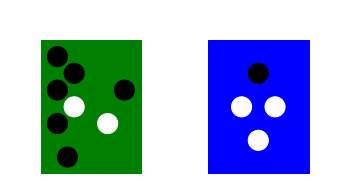

In [25]:
urn()

Let's consider the previous example of drawing marbles from the two urns.

Suppose we repeat this experiment for many times and observe that:
-   We pick the green urn 40% of the times;
-   We pick the blue urn 60% of the times;
-   Once we selected a urn, we are equally likely to select any of the
    marble contained in it, but we know that colors are not distributed evenly in the urns (see figure).

Using a frequentist approach, we can define the probabilities:
-   $P(U = b) = \frac{6}{10}$
-   $P(U = r) = \frac{4}{10}$

This is done by using the formula:
* $P(X = x) = \frac{\#\ of\ times\ X = x}{\#\ trials}$

## Joint probability

We can define **univariate** (= with respect to only one variable)
probabilities $P(U)$ and $P(M)$ as we have seen in the previous
examples.

However, in some cases, it is useful to define probabilities on more
than one variable at the time. For instance, we could be interested in
studying the probability of picking a given fruit from a given box. In
this case, we would be interested in the **joint probability** $P(B,F)$.

In general, we can have joint probabilities with arbitrary numbers of
variable. For instance,
$P\left( X_{1},X_{2},X_{3},\ldots,X_{n} \right)$.

Joint probabilities are symmetric, i.e., $P(X,Y) = P(Y,X)$.

We should note that, when dealing with multiple unidimensional
variables, we can always define a new multi-variate variable comprising
all of them:

-   $X = \left\lbrack X_{1},X_{2} \right\rbrack;$

-   $P(X) = P\left( X_{1},X_{2} \right)$.

### Example

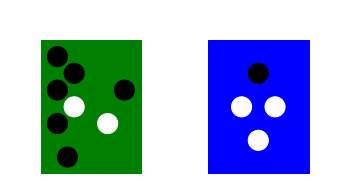

In [26]:
urn()

We can see the concept of joint probability in the context of the
examples of the two urns.

We have seen how to define the univariate probability $P(U)$ over the
whole probability space of $U$.

However, we could be interested in the probability of both variables
jointly: $P(U,M)$, i.e., the joint probability of U and M.

To 'measure' the joint probability, we could repeat the experiment for
many times and observe the outcomes.

We can then build a contingency table which keeps track of how many
times we observed a given combination:

| | Green Urn | Blue Urn | All |
|-|-|-|-|
|White | 10 | 15 | 25 |
|Black | 30 | 45 | 75 |
|All   | 40 | 60 | 100|

From the table above, we can easily derive the joint probability of a
given pair of values using the **frequentist approach**. For instance:

$$P(U = b,M = b) = \frac{\#\ times\ (b,a)\ occurs}{\#\ trials} = \frac{15}{100}$$

Similarly, we can derive the other values:

-   $F(U = b,M = b) = \frac{45}{100}$

-   $F(U = g,M = w) = \frac{10}{100}$

-   $F(U = g,M = b) = \frac{30}{100}$

Note that we can also obtain the univariate probabilities by using the
values in the "sum" row and column. For instance:

$$P(U = b) = \frac{\#\ times\ b\ occurred}{\#\ trials} = \frac{15 + 45}{100} = \frac{60}{100}$$

Similarly:

-   $P(U = g) = \frac{40}{100}$

-   $P(M = w) = \frac{25}{100}$

-   $P(M = b) = \frac{30}{100}$

These univariate probabilities computed starting from joint
probabilities are usually called "marginal probabilities" (we are using
the sums in the margin of the table).

We can obtain a joint probability table by dividing the able in the
figure by the total number of trials (100):

  
|                   | **Green Urn**   |    **Blue Urn**   |   **Sum** |
|  -----------------| -----------------| -----------------| ----------------- |
|  **White**     |    10/100       |     15/100      |      25/100 |
|  **Black**    |    30/100       |     45/100      |      75/100 |
|  **Sum**       |    40/100       |     60/100      |      100/100 |



## Sum Rule (Marginal Probability)

In the previous example, we have seen how we can compute **marginal
(univariate) probabilities** from the contingency table. This is
possible because the contingency table contains information on how the
different possible outcomes distribute over the sample space.

In general, we can compute marginal probabilities form joint
probabilities (i.e., we don't need to have the non-normalized frequency
counts of the contingency table). Let us consider the general contingency table:

|             | Y=$y_1$        | Y=$y_2$ | ... | Y=$y_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| X=$x_1$     | $n_{11}$  | $n_{12}$  | ... | $n_{1l}$ | $n_{1+}$ |
| X=$x_2$     | $n_{21}$  | $n_{22}$  | ... | $n_{2l}$ | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| X=$x_k$     | $n_{k1}$  | $n_{k2}$  | ... | $n_{kl}$ | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |


We can compute the joint probability $P(X = x_{i},Y = y_{j})$ with a
frequentist approach using the formula:

$$P\left( X = x_{i},\ Y = y_{j} \right) = \frac{n_{ij}}{n}$$

Note that these are the joint frequencies $f_{ij}$ we mentioned in the past.

Also, we note that we can define the marginal probabilities of X and Y
as follows:

-   $P\left( X = x_{i} \right) = \frac{n_{i+}}{n}$.
-   $P\left( Y = y_{j} \right) = \frac{n_{+j}}{n}$.

Note that $n_{i+}$ can be seen as the sum of all occurrences in which
$X = x_{i}$ (i.e., we are summing all values in row $i$):

$$n_{i+} = \sum_{j} n_{ij}$$

We can write the marginal probability of $X$ as follows:

$$P\left( X = x_{i} \right) = \frac{n_{i+}}{n} = \frac{\sum_{j}n_{ij}}{n} = \sum_{j}\frac{n_{ij}}{n} = \sum_{j}^{}{P(X = x_{i},Y = y_{j})}$$

This result is known as the **sum rule of probability**, which allows to
estimate marginal probabilities from joint probabilities. This can be
seen in more general terms as:

$$P(X = x) = \sum_{y}^{}{P(X = x,Y = y)}$$

The act of computing $P(X)$ from $P(X,Y)$ is also known as
marginalization.

## Conditional Probability

**In many cases, we are interested in the probability of some event,
given that some other event happened.**

This is called **conditional** **probability** and is denoted
as$\ P\left( X = x \middle| Y = y \right)$ and read as "P of X=y given
that Y=y". In this context, $Y = y$ is the condition, and we are
interested in studying the probability of X only in the cases in which
the condition is verified.

For instance, in the case of the two urns, we could be interested in
$P(M = w|U = b)$, i.e., what is the probability of picking a white marble,
given that we know that we are drawing from the blue urn?

Let's consider our example contingency table of two variables again:

|             | Y=$y_1$        | Y=$y_2$ | ... | Y=$y_l$ | Total   |
|-------------|------------|------------|---------|-|-|
| X=$x_1$     | $n_{11}$  | $n_{12}$  | ... | $n_{1l}$ | $n_{1+}$ |
| X=$x_2$     | $n_{21}$  | $n_{22}$  | ... | $n_{2l}$ | $n_{2+}$ |
| ...     | ... | ... | ... | ...| ...| ...|
| X=$x_k$     | $n_{k1}$  | $n_{k2}$  | ... | $n_{kl}$ | $n_{k+}$ |
| Total       | $n_{+1}$  | $n_{+2}$ | ... |  $n_{+l}$  | $n$ |

We can compute the conditional probability
$P(X = x_{i}|Y = y_{j})$ using the frequentist approach:

$$P\left( X = x_{i} \middle| Y = y_{j} \right) = \frac{\#\ cases\ in\ which\ X = x_{i}\ and\ Y = y_{i}}{\#\ cases\ in\ which\ Y = y_{j}} = \frac{n_{ij}}{n_{+j}}$$

If we multiply the expression above by $1 = \frac{n}{n}$, we obtain:

$$P\left( X = x_{i} \middle| Y = y_{j} \right) = \frac{n_{ij}}{n}\frac{n}{n_{+j}} = \frac{\frac{n_{ij}}{n}}{\frac{n_{+j}}{n}} = \frac{P\left( X = x_{i},Y = y_{j} \right)}{P(Y = y_{j})}$$

This leads us to the general definition of conditional probability:

$$P\left( X = x \middle| Y = y \right) = \frac{P(X = x,\ Y = y)}{P(Y = y)}$$

The conditional probability is defined only when $P(Y = y) > 0$, that
is, we cannot define a probability conditioned on an event that never
happens. It should be noted that, in general
$P\left( X \middle| Y \right) \neq P(X)$.

## Product Rule (Factorization)

We can see the definition of conditional probability:

$$P\left( X = x \middle| Y = y \right) = \frac{P(X = x,\ Y = y)}{P(Y = y)}$$

As follows:

$$P(X = x,Y = y) = P\left( X = x \middle| Y = y \right)P(Y = y)$$

which is often referred to as **the product rule**.

*The product rule allows to compute joint probabilities starting from
conditional probabilities and marginal probabilities.* This is useful
because measuring joint probabilities generally involves creating large
tables, whereas conditional and marginal probabilities might be easier
to derive.

This operation of expressing a joint probability in terms of two factors
is known as *factorization*.



### How to compute a conditional probability?

We just said that factorization can be useful for computing joint
probabilities starting from conditional probabilities. However, two
questions arise: "how can we compute a conditional probability?" and "Is
it easier than computing a joint probability?".

Since conditional probabilities are obtained by *restricting* the
probability space to *a subset* of the events, we can compute
conditional probabilities by considering the observations which satisfy
the condition.

For example, let's say we want to compute the conditional probability:

$$P(M|U = b)$$

That is to say, the probability of taking a marble of a given color, given
that we know that we are considering the blue urn. Let's consider again our contingency table:

| | Green Urn | Blue Urn |
|-|-|-|
|White | 10 | 15 | 
|Black | 30 | 45 | 

To compute this probability, we can just *consider all the observations
that satisfy the condition* $U = b$, which is equivalent to taking the
second column of the full contingency table and compute the
probabilities in a frequentist way:

| | Blue Urn |
|-|-|
|White |  15 | 
|Black | 45 | 

$$ P(M=w|U=b) = \frac{15}{60} $$
$$ P(M=b|U=b) = \frac{45}{60} $$

Note that, in general, when the number of variables is large, this
approach allows to save a lot of space and time as it is not necessary
to even build the first contingency table, but only the second,
restricted one is required (for instance, one may choose not to record
all observations in which the user has drawn from the red box).

## The Chain Rule of Conditional Probabilities

When dealing with multiple variables, the product rule can be applied in
an iterative fashion, thus obtaining the 'chain rule' of conditional
probabilities.

For instance:

$$P(X,Y,Z) = P\left( X \middle| Y,Z \right)P(Y,Z)$$

Since:

$$P(Y,Z) = P\left( Y \middle| Z \right)P(Z)$$

We obtain:

$$P(X,Y,Z) = P\left( X \middle| Y,Z \right)P\left( Y \middle| Z \right)P(Z)$$

Since joint probabilities are symmetric, we could equally obtain:

$$P(X,Y,Z) = P\left( Z \middle| Y,X \right)P\left( Y \middle| X \right)P(X)$$

This rule can be formalized as follows:

$$P\left( X_{1},\ldots,\ X_{n} \right) = P\left( X_{1} \right)\prod_{i = 2}^{n}{P(X_{i}|X_{1},\ldots,\ X_{i - 1})}$$



## Bayes' Theorem

Given two variables A and B, from the product rule, we obtain:

-   $P(A,B) = P\left( A \middle| B \right)P(B)$

-   $P(B,A) = P\left( B \middle| A \right)P(A)$

Since joint probabilities are symmetric, we have:

$$P(A,B) = P(B,A) \rightarrow P\left( A \middle| B \right)P(B) = P\left( B \middle| A \right)P(A)$$

Which implies:

$$P\left( A \middle| B \right) = \frac{P\left( B \middle| A \right)P(A)}{P(B)}$$

This last expression is known as Bayes' Theorem (or Bayes' rule).

Technically speaking, the Bayes' rule can be used to "turn"
probabilities of the kind $P(A|B)$ into probabilities of the kind
$P(B|A)$.

More formally, the Bayes' rule can be used to ***update
our expectation that some event will happen (event A) when we observe
some evidence (event B)**. This links to the Bayesian interpretation of
probability, according to which probability can be seen as **a
*reasonable expectation* representing *the quantification of a degree of
belief*** (i.e., how much we believe some event will happen).

The different terms on the Bayes' rule have specific names:

-   $P(A)$ is called 'the prior' -- this is our expectation that A
    happens when we do not have any other data to rely on

-   $P(B|A)$ is called 'the likelihood' -- this quantifies how likely it
    is to observe event B happening if we assume that event A has
    happened

-   $P(B)$ is called 'the evidence' -- this models the probability of
    observing event B

-   $P(A|B)$ is called 'the posterior' -- this is our updated
    probability, i.e., how likely it is A to happen once we have
    observed B happening

We'll see an example in the section below.

### Bayesian Probability Example

Let's imagine we are trying to understand if a friend has COVID or not.
If we do not know anything about our friend's symptoms (i.e., we don't
know if they have any symptoms or not), then we would expect our friend
to have COVID with a "prior" probability $P(C)$. If we know that
currently one people over two has COVID, we expect:

$$P(C) = \frac{1}{2}$$

Now, if our friend tells us he has fever, things change a bit. We are
now interested in modeling the probability:
$P\left( C \middle| F \right)$. We can try to model it using Bayes'
rule:

$$P\left( C \middle| F \right) = \frac{P\left( F \middle| C \right)P(C)}{P(F)}$$

Note that it is not straightforward to estimate $P(C|F)$ in a
frequentist way. Ideally, we should take all people with a fever on
earth and check how many of them has COVID. This is not feasible as
people with just fever may never do a COVID test. On the contrary,
measuring $P(F|C)$ is easier: we take all people which we know have
COVID (these may not be all people with COVID, but probably a large
enough sample) and see how many of them have a fever. Let's suppose that
one people with COVID out of three has a fever. Then we can expect:

$$P\left( F \middle| C \right) = \frac{1}{3}$$

Now we need to estimate the evidence $P(F)$. This can be done by
considering how frequent it is for people to have a fever. Let's say we
use historical data and find out that one person out of five has fever.
We finally have:

$$P\left( C \middle| F \right) = \frac{\frac{1}{3}\frac{1}{2}}{\frac{1}{5}} = \frac{5}{6}$$

We can interpret this use of the Bayes' theorem as follows:

-   Before knowing anything about symptoms, we could only guess that our
    friend had COVID with a prior probability of $P(C) = \frac{1}{2}$

-   When we get to know that our friend has a fever, our expectation
    changes. We know that people with COVID often get a fever, but we
    also know that not all people with COVID get a fever, so we are not
    going to say that we are 100% certain that our friend has fever.
    Instead, we use Bayes' rule to obtain an updated estimate
    $P\left( C \middle| F \right) = \frac{5}{6}$ based on our knowledge
    of the likelihood $P(F|C)$ (how likely it is for people with symptom
    to have COVID) and the evidence $P(F)$ (how common is this symptom
    -- if it is too common, then it is not so informative)



## Independence and Conditional Independence

Two variables $X$ and $Y$ are independent if the outcome of one of the
two does not influence the outcome of the other. Formally speaking, two
variables are **said to be independent** if and only if:

$$P(X,Y) = P(X)P(Y)$$

We have seen why definition this makes sense in the context of the Pearson's $\chi^2$ statistic. The same considerations apply here.

It should be noted that the expression above **is generally not true**
as we cannot always assume that two variables are independent.

Independence can be denoted as:

$$X\bot Y$$

Moreover, if two variables $X$ and $Y$ are independent, then:

$$P\left( X \middle| Y \right) = \frac{P(X,Y)}{P(Y)} = \frac{P(X)P(Y)}{P(Y)} = P(X)$$

This makes sense because it means that "the fact that $Y$ happens does
not influence the fact that $X$ happens", which is what we would expect
of two independent variables $X$ and $Y$.

### Examples

Intuitively, two variables are independent if the values of one of them
do not affect the values of the other one:

-   Weight and height of a person are **not independent**. Indeed,
    taller people are usually heavier.

-   Height and richness are **independent**, as the richness does not
    depend on the height of a person.



### Conditional independence

Two random variables $X$ and $Y$ are said to be **conditionally
independent** given a random variable $Z$ if:

$$P\left( X,Y \middle| Z \right) = P\left( X \middle| Z \right)P\left( Y \middle| Z \right)$$

Conditional independence can be denoted as:

$$X\bot Y\ |\ Z$$

#### Example

Height and vocabulary are not independent: taller people are usually
older, and hence they have a more sophisticated vocabulary (they know
more words). However, if we condition on age, they become independent.
Indeed, among people of the same age, height should not influence
vocabulary. Hence, height and vocabulary are **conditionally
independent** with respect to age.



## Example of Probability Manipulation

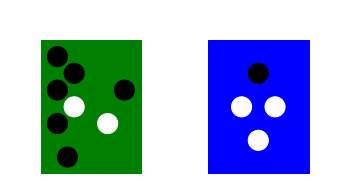

In [27]:
urn()

Let's get back to our example of the two boxes and let's suppose that,
by repeating several trials, we discovered the following probabilities
(in a frequentist way):

-   $P(U = g) = \frac{4}{10}$
-   $P(U = b) = \frac{6}{10}$

We also focused on a given urn and performed different trials, observing
the following proportions:

-   $P\left( M = w \middle| U = g \right) = \frac{1}{4}$
-   $P\left( M = b \middle| U = g \right) = \frac{3}{4}$
-   $P\left( M = w \middle| U = b \right) = \frac{3}{4}$
-   $P\left( M = b \middle| U = b \right) = \frac{1}{4}$

We shall note that these probabilities are normalized such that:

-   $P(U = g) + P(U = b) = 1$

-   $P\left( M = w \middle| U = g \right) + P\left( M = b \middle| U = g \right) = 1$

-   $P\left( M = w \middle| U = b \right) + P\left( M = b \middle| U = b \right) = 1$

We can now use the rules we have seen before to answer questions such
as:

-   What is the overall probability of choosing a white marble?

-   What is the probability of picking a green urn, given that we have
    drawn a black marble?

**What is the overall probability of choosing an white marble?**

To answer this question, we need to find $P(M = w)$. We note that, by
the sum rule:

$$P(M = w) = P(M = w,U = b) + P(M = w,B = g)$$

We also observe that the joint probabilities can be recovered using the
product rule:

$$P(M = w,U = b) = P\left( M = w \middle| U = b \right)P(U = b)$$

$$P(M = w,U = g) = P\left( M = w \middle| U = g \right)P(U = g)$$

Hence, our probability can be found using the formula:

$$P(M = w) = P\left( M = w \middle| U = b \right)P(U = b) + P\left( M = w \middle| U = g \right)P(U = g) =$$

$$= \frac{3}{4} \cdot \frac{6}{10} + \frac{1}{4} \cdot \frac{4}{10} = \frac{18 + 4}{40} = \frac{22}{40} = \frac{11}{20}$$

From the definition of probability, we have:

$$P(M = w) + P(M = b) = 1$$

Hence:

$$P(M = b) = 1 - P(M = w) = 1 - \frac{11}{20} = \frac{9}{20}$$

**What is the probability of picking a green urn, given that we have drawn
an black marble?**

To answer this question, we need to find the conditional probability
$P(U = g|M = b)$. To find this probability, we need to 'invert' our
conditional probabilities using the Bayes' rule:

$$P\left( U = g \middle| M = b \right) = \frac{P\left( M = b \middle| U = g \right)P(U = g)}{P(M = b)} = \frac{\frac{3}{4} \cdot \frac{4}{10}}{\frac{9}{20}} = \frac{12}{40} \cdot \frac{20}{9} = \frac{6}{9} = \frac{2}{3}$$

### Excercise

Suppose that we have three colored boxes r (red), b (blue), and g
(green). Box r contains 3 apples, 4 oranges, and 3 limes, box b contains
1 apple, 1 orange, and 0 limes, and box g contains 3 apples, 3 oranges,
and 4 limes. If a box is chosen at random with probabilities P(r)=0.2,
P(b)=0.2, P(g)=0.6, and a piece of fruit is extracted from the box (with
equal probability of selecting any of the items in the box), then what
is the probability of selecting an apple? If we observe that the
selected fruit is in fact an orange, what is the probability that it
came from the green box?



## Probability Distributions

We have seen how it is possible to assign a probability value to a given
outcome of a random variable.

In practice, it is often useful to assign probability values to **all
the values** that the random variable can assume.

To do so, we can define a **function**, which we will call **probability
distribution** which assigns a probability value to each of the possible
values of a random variable.

In the case of discrete variables, we will talk about "**probability
mass functions**", whereas in the case of continuous variable, we will
refer to "**probability density functions**".

A probability distribution characterizes the random variable and defines
which outcomes it is more likely to observe.

Once we find that a given random variable $X$ is characterized by a
probability distirbution $P(X)$, we can say that **"X follows P"** and
write:

$$X \sim P$$



### Probability Mass Functions (PMF) - Discrete Variables

If $X$ is discrete, $P(X)$ is called a "probability mass function"
(PMF). $P$ maps the values of $X$ to real numbers indicating whether a
given value is more or less likely.

A PMF on a random variable $X$ is a function

$$P:\chi \rightarrow \lbrack 0,1\rbrack$$

Where $\chi$ is the alphabet of $X$.

This function satisfies the following properties:

-   **The domain of** $\mathbf{P}$ **is the set of all possible states
    of** $\mathbf{X}$**.**

-   $\mathbf{\forall}\mathbf{x}\mathbf{\in}\chi\mathbf{,\ }\mathbf{0}\mathbf{\leq}\mathbf{P}\left( \mathbf{x} \right)\mathbf{\leq}\mathbf{1}$.
    An impossible event has probability 0, whereas a certain event has
    probability 1. No event can have negative probability or probability
    larger than 1.

-   $\sum_{\mathbf{x}\mathbf{\in}\mathbf{\chi}}^{}{\mathbf{P}\mathbf{(}\mathbf{x}\mathbf{)}}\mathbf{=}\mathbf{1}$.
    The sum of the probabilities associated to all possible events must
    be one. This implies that the probability distribution is
    normalized. Also, this means that at least one of the events should
    happen.

**Example:** Let $X$ be the random variable indicating the outcome of a
coin toss.

-   The space of all possible functions (the domain of $P(X)$) is
    $\{ head,\ tail\}$.

-   The probabilities $P(head)$ and $P(tail)$ must be larger than or
    equal to zero and smaller than or equal to 1.

-   Also, $P(head) + P(tail) = 1\ $. This is obvious, as one of the two
    outcomes will always happen. Indeed, if we had $P(tail) = 0.3$, this
    would mean that, 30 times out of 100 times we toss a coin, the
    outcome will be tail. What will happen in all other cases? The
    outcome will be head, hence, $P(head)$, so $P(head) + P(tail) = 1$.

-   In the case of a fair coin, we can characterize $P(X)$ as a
    "discrete uniform distribution", i.e., a distribution which maps any
    value $x \in X$ to a constant, such that the properties of the
    probability mass functions are satisfied.

-   If we have $N$ possible outcomes, the discrete uniform probability
    will be $P(X = x) = \frac{1}{N}$ , which means that all outcomes
    have the same probability.

-   This definition satisfies the constraints. Indeed,
    $\frac{1}{N} \geq 0,\ \forall N$ and
    $\sum_{i}^{}{P\left( X = x_{i} \right)} = 1$.



#### Example: Probability Mass Function for a Fair Coin

A probability mass function can be plotted as a 2D diagram where the
values of the function ($P(x)$) is plotted against the values of the
independent variable $x$. This is the diagram associated to the PMF of
the previous example, where $P(head) = P(tail) = 0.5$.


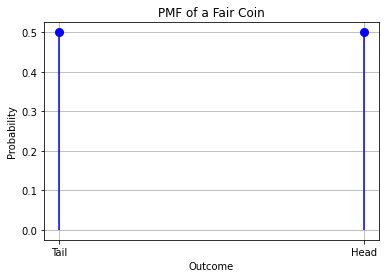

In [ ]:
import matplotlib.pyplot as plt

# Define the outcomes of a fair coin (0 for tails, 1 for heads)
outcomes = [0, 1]
labels = ["Tail", "Head"]

# Probability of each outcome for a fair coin
probability = [0.5, 0.5]

# Create the PMF plot with vertical lines and dots
plt.vlines(outcomes, ymin=0, ymax=probability, colors='b', linestyles='solid')
plt.plot(outcomes, probability, 'bo', markersize=8)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('PMF of a Fair Coin')
plt.xticks(outcomes, labels)
plt.grid(True)

# Show the plot
plt.show()


#### Example: Probability Mass Function for a Biased Coin

Now suppose we tossed our coin for 10000 times and discovered that 6000
times the outcome was "head", whereas 4000 times it was "tail". We
deduce the coin is not fair.

Using a **frequentist** approach, we can manually assign values to our
PMF using the general formula:

$$P(x) = \frac{\# trials\ in\ which\ X = x}{\#\ trials}$$

That is, in our case:

$$P(head) = \frac{6000}{10000} = 0.6;P(tail) = \frac{4000}{10000} = 0.4$$

We shall note that the probability we just defined satisfies all
properties of probabilities, i.e.:

-   $0 \leq P(x) \leq 1\ \forall x$

-   $\sum_{x}^{}{P(x) = 1}.$

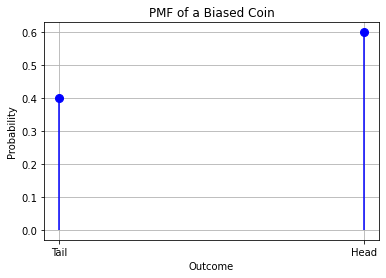

In [ ]:
import matplotlib.pyplot as plt

# Define the outcomes of a biased coin (0 for tails, 1 for heads)
outcomes = [0, 1]
labels = ["Tail", "Head"]

# Probability of each outcome for a biased coin
probability = [0.4, 0.6]

# Create the PMF plot with vertical lines and dots
plt.vlines(outcomes, ymin=0, ymax=probability, colors='b', linestyles='solid')
plt.plot(outcomes, probability, 'bo', markersize=8)
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('PMF of a Biased Coin')
plt.xticks(outcomes, labels)
plt.grid(True)

# Show the plot
plt.show()


#### Exercise: Probability Mass Function

Let $X$ be a random variable representing the outcome of rolling a fair
dice with $6$ faces:

-   What is the space of possible values of $X$?

-   What is its cardinality?

-   What is the associated probability mass function $P(X)$?

-   Suppose the dice is not fair and $P(X = 1) = 0.2$, whereas all other
    outcomes are equally probable. What is the probability mass function
    of $P(X)$?

-   Draw the PMF obtained for the dice.



### Probability Density Functions (PDF) - Continuous Variables

Probability distributions are called "probability density functions"
when the random variable is continuous.

To be a probability density function over a variable $X$, a function
$f:\Omega \rightarrow \lbrack 0,1\rbrack$ must satisfy the following
properties:

-   The domain of $f$ is the set of all possible values of $X$.

-   $\forall x \in \chi,\ P(x) \geq 0$. No probability can be negative.

-   $\int f(x)dx = 1$. This is equivalent to $\sum P(x) = 1$ in the
    case of a discrete variable. The sum turns into an integral in the
    case of continuous variables.

Note that, in the case of continuous variables, we have:

$$ P(a \leq x \leq b) = \int_{a}^b f(x) $$

**NOTE**: In general, we say that the density function at a given value $x$ is zero: $f(x)=0$. While this may seem counter-intuitive, we should consider the density function as the limit fo the probability as we narrow a neighborhood around $x$. If the neighborhood has size $0$, then the density will be zero. In practice, if we take a neighborhood which is non-zero, then we get an integral between two values and a final probability not equal to zero.

After all, from an intuitive point of view, the probability of having a value exactly equal to $x$ is indeed zero, in the case of a continuous variable! So we should be more interested in the probability in a given range of values.

#### Example: Uniform PDF
Let us consider a random number generator which outputs numbers comprised between $a$ and $b$.

Let $X$ be a random variable assuming the values generated by the
    random number generator.

The PDF of $X$ will be a uniform distribution such that:

-   $P(x) = 0\ \forall x < a\ \ or\ x > b$;

-   $P(x) = \frac{1}{b - a}\ \forall a \leq x \leq b$;

We can see that this PDF satisfies all constraints:

-   $P(x) \geq 0\ \forall x.$

-   $\int P(x)dx = 1$ (prove that this is true as an exercise).

The diagram below shows an illustration of a uniform PDF with bounds a and b,
i.e., $U(a,b)$. Of course, continuous distributions can be (and
generally are) much more complicated than that.

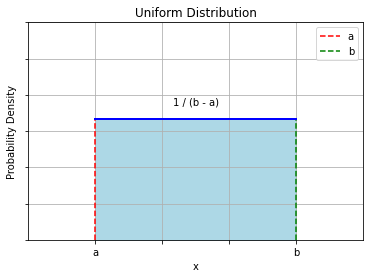

In [ ]:
import matplotlib.pyplot as plt

# Define the parameters for the uniform distribution
a = 2  # Start of the interval
b = 8  # End of the interval

# Generate data points for the uniform distribution
x = [a, b]
y = [1 / (b - a)] * 2

# Create the uniform distribution plot
plt.plot(x, y, 'b-', lw=2)  # Blue line representing the uniform distribution
plt.fill_between(x, y, color='lightblue')  # Highlight the area under the curve

# Highlight "a" and "b" with vertical lines that stop at the blue line
plt.axvline(a, color='red', linestyle='--', label='a', lw=1.5, ymax=(3.3 / (b - a)))
plt.axvline(b, color='green', linestyle='--', label='b', lw=1.5, ymax=(3.3 / (b - a)))

plt.text((a + b) / 2, 1 / (b - a) + 0.02, f'1 / (b - a)', horizontalalignment='center')


plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Uniform Distribution')
plt.legend()
plt.xlim([0, 10])
plt.ylim([0, 0.3])
plt.xticks([a, 4, 6, b], ['a', '', '', 'b'])
plt.yticks([0,0.05,0.1,0.15,0.2,0.25,0.3], ['','','','','','',''])


# Show the plot
plt.grid(True)
plt.show()


#### Cumulative Distribution Functions (CDF)

Similar to the Empirical Cumulative Distribution Functions, we can define Cumulative Distribution Functions for random variables, starting from the density or mass functions. A cumulative distribution function is generally defined as:

$$ F(x) = P(X \leq x) $$

#### CDF of Continuous Random Variables
In the case of continuous random variables, the definition leads to:

$$F(x) = \int_{-\infty}^x P(x)dx$$

The CDF is useful in different ways. For instance, it's easy to see that:

$$P(a \leq X \leq b) = \int_a^b f(x)dx = \int_{-\infty}^b f(x)dx - \int_{-\infty}^a f(x)dx = F(b) - F(a)$$

#### Example
The CDF of the uniform distribution will be given by:

- $F(x) = 0$ for $x < a$
- $F(x) = \frac{x - a}{b - a}$ for $a \leq x \leq b$
- $F(x) = 1$ for $x > b$

The plot below shows a diagram:

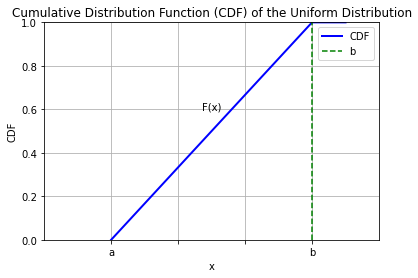

In [ ]:
import matplotlib.pyplot as plt

# Define the parameters for the uniform distribution
a = 2  # Start of the interval
b = 8  # End of the interval

# Generate data points for the CDF of the uniform distribution
x = [a, b, b + 1]
y = [0, (x[1] - a) / (b - a), 1]

# Create the CDF plot
plt.plot(x, y, 'b-', lw=2, label='CDF')

# Highlight "a" and "b" with vertical lines that stop at the blue line
#plt.axvline(a, color='red', linestyle='--', label='a', lw=1.5, ymax=(x[1] - a) / (b - a))
plt.axvline(b, color='green', linestyle='--', label='b', lw=1.5, ymax=1)

plt.text((a + b) / 2, 0.6, f'F(x)', horizontalalignment='center')

plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function (CDF) of the Uniform Distribution')
plt.legend()
plt.xlim([0, 10])
plt.ylim([0, 1])
plt.xticks([a, 4, 6, b], ['a', '', '', 'b'])
#plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['', '', '', '', '', ''])

# Show the plot
plt.grid(True)
plt.show()


#### CDF of Discrete Random Variables
In the case of discrete random variables, the definition of CDF leads to:

$$F(x) = \sum_{y\leq x} P(y)$$

##### Example - PDF and CDF of a fair die

In the case of a fair die, the PMF will be:

$$
f(x) = \begin{cases} 
\frac{1}{6} & \text{if } x \in \{1, 2, 3, 4, 5, 6\} \\
0 & \text{otherwise}
\end{cases}
$$

The CDF will be:

$$
F(x) = \begin{cases} 
0 & \text{if } x < 1 \\
\frac{1}{6} & \text{if } 1 \leq x < 2 \\
\frac{1}{3} & \text{if } 2 \leq x < 3 \\
\frac{1}{2} & \text{if } 3 \leq x < 4 \\
\frac{2}{3} & \text{if } 4 \leq x < 5 \\
1 & \text{if } x \geq 5
\end{cases}
$$

The diagram below shows an example:

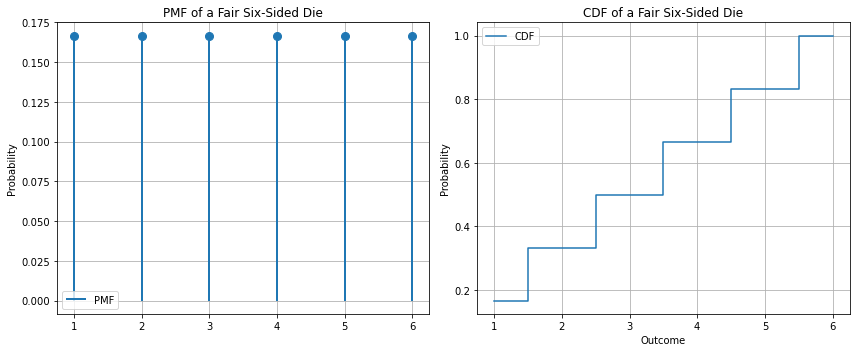

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Number of sides on the die
num_sides = 6

# Create an array of possible outcomes (1 through 6)
outcomes = np.arange(1, num_sides + 1)

# Calculate the PMF for a fair die
pmf = np.full(num_sides, 1/num_sides)

# Calculate the CDF for a fair die
cdf = np.cumsum(pmf)

# Create a figure with vertical subplots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(12, 5))

# Plot the PMF with vertical lines and dots in the first subplot
ax1.vlines(outcomes, 0, pmf, lw=2, label='PMF')
ax1.plot(outcomes, pmf, 'o', markersize=8)
ax1.set_ylabel('Probability')
ax1.set_title('PMF of a Fair Six-Sided Die')
ax1.legend()
ax1.grid(True)

# Plot the CDF in the second subplot with only horizontal lines
ax2.step(outcomes, cdf, where='mid', label='CDF')
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('CDF of a Fair Six-Sided Die')
ax2.legend()
ax2.grid(True)

plt.xticks(outcomes)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Expectation

When it is known that a random variable follows a probability
distribution, **it is possible to characterize that variable** (and
hence the related probability distribution) **with some statistics**.

The most straightforward of them is the expectation. **The concept of
expectation is very related to the concept of mean.** When we compute
the mean of a given set of numbers, we usually sum all the numbers
together and then divide by the total.

Since a probability distribution will tell us which values will be more
frequent than others, we can compute this mean with a weighted average,
where the weights are given by the probability distribution.

Specifically, we can define the expectation of a random variable X as
follows:

$$E_{X\sim P}\lbrack X\rbrack = \sum_{x \in \chi}^{}{xP(x)}$$

In the case of continuous variables, the expectation takes the form of
an integral:

$$E_{X \sim P}\lbrack X\rbrack = \int xP(x)dx$$

This is very related to the concept of mean value (or expected value) of
a random variable.



### Variance

The variance gives a measure of how much variability there is in a
variable $X$ around its mean $E\lbrack X\rbrack$.

The variance is defined as follows:

$$var\lbrack X\rbrack = E\lbrack\left( X - E\lbrack X\rbrack \right)^{2}\rbrack$$



### Covariance

The covariance gives a measure of how two variables are linearly related
to each other. It allows to **measure to what extent the increase of one
of the variables corresponds to an increase of the value of the other
one**.

Given two random variables $X$ and $Y$, the covariance is defined as
follows:

$$Cov(X,Y) = E\lbrack\left( X - E\lbrack X\rbrack \right)\left( Y - E\lbrack Y\rbrack \right)\rbrack$$

We can distinguish the following terms:

-   $E\lbrack X\rbrack$ and $E\lbrack Y\rbrack$ are the expectations of
    $X$ and $Y.$

-   $(X - E\lbrack X\rbrack)$ and $(Y - E\lbrack Y\rbrack)$ are the
    differences between the samples and the expected values.

-   $\left( X - E\lbrack X\rbrack \right)\left( Y - E\lbrack Y\rbrack \right)$
    computes the product between the differences.

We have:
* If the signs of the terms agree, the product is positive.
* If the signs of the terms disagree, the product is negative.

In practice, if when $X$ is larger than the mean, then $Y$
            is larger than the mean and vice versa, when $X$ is lower
            than the mean then $Y$ is lower than the mean, then the two
            variables are *correlated,* and the covariance is high.

If $X$ is a multi-dimensional variable
$X = \lbrack X_{1},X_{2},\ldots,X_{n}\rbrack$, we can compute all the
possible covariances between variable pairs:
$Cov\lbrack X_{i},X_{j}\rbrack$. This allows to create a matrix, which
is generally referred to as **the covariance matrix**. The general term
of the covariance matrix $Cov(X)$ is given by:

$$Cov(X)_{i,j} = \Sigma_{ij} = Cov(X_{i},X_{j})$$



### Standardization

Similar to z-scoring, standardization transforms a random variable $X$ into a variable $Z$ so that it has:
* Expectation equal to zero: $E(X) = 0$.
* Variance equal to one: $Var(X) = 1$.

The new standardized variable will be:

$$Z = \frac{X - \mu_X}{\sigma_X} = \frac{X-E[X]}{\sqrt{Var[X]}}$$

## References

-   Parts of chapter 1 of \[1\];
-   Most of chapter 3 of \[2\];
-   Parts of chapters 5-7 of \[3\].


\[1\] Bishop, Christopher M. *Pattern recognition and machine learning*.
springer, 2006.
<https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf>

\[2\] Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. *Deep
learning*. MIT press, 2016. <https://www.deeplearningbook.org/>

\[3\] Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.
